In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
sol_df = pd.read_csv(Path('../../resources/prices/coin_Solana.csv'), index_col='SNo')
sol_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00
2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00
4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00
5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00
...,...,...,...,...,...,...,...,...,...
319,Solana,SOL,2021-02-23 23:59:59,15.743371,11.599894,14.421626,15.201538,4.852528e+08,3.981285e+09
320,Solana,SOL,2021-02-24 23:59:59,18.146622,14.861799,15.213842,17.302707,3.754397e+08,4.531581e+09
321,Solana,SOL,2021-02-25 23:59:59,17.695445,13.795913,17.230183,13.816014,3.645053e+08,3.618416e+09


In [3]:
sol_df['Date'] = pd.to_datetime(sol_df['Date']).dt.date
sol_df['Date'] = pd.to_datetime(sol_df['Date'])
sol_df['Spread'] = sol_df.High - sol_df.Low
sol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 1 to 323
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       323 non-null    object        
 1   Symbol     323 non-null    object        
 2   Date       323 non-null    datetime64[ns]
 3   High       323 non-null    float64       
 4   Low        323 non-null    float64       
 5   Open       323 non-null    float64       
 6   Close      323 non-null    float64       
 7   Volume     323 non-null    float64       
 8   Marketcap  323 non-null    float64       
 9   Spread     323 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 27.8+ KB


## Plot the closing value of Solana over time

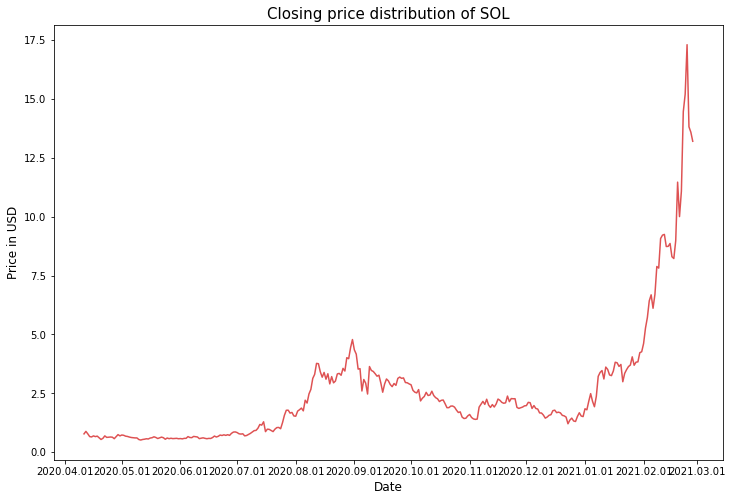

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = sol_df.Close.values, x=sol_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = sol_df.Close.values, x=sol_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of SOL", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

sol_df['Date_mpl'] = sol_df['Date'].apply(lambda x: mdates.date2num(x))

temp_sol_df = sol_df.copy(deep=False)
temp_sol_df = temp_sol_df.set_index(['Date'])
temp_sol_df = temp_sol_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_sol_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2020-04-11,1.049073,0.765020,0.951054,0.776819,4.386244e+07,18363.0
2020-04-12,0.956670,0.762426,0.785448,0.882507,3.873690e+07,18364.0
2020-04-13,0.891603,0.773976,0.890760,0.777832,1.821129e+07,18365.0
2020-04-14,0.796472,0.628169,0.777832,0.661925,1.674761e+07,18366.0
2020-04-15,0.704964,0.621531,0.669289,0.646651,1.307528e+07,18367.0
...,...,...,...,...,...,...
2021-02-23,15.743371,11.599894,14.421626,15.201538,4.852528e+08,18681.0
2021-02-24,18.146622,14.861799,15.213842,17.302707,3.754397e+08,18682.0
2021-02-25,17.695445,13.795913,17.230183,13.816014,3.645053e+08,18683.0


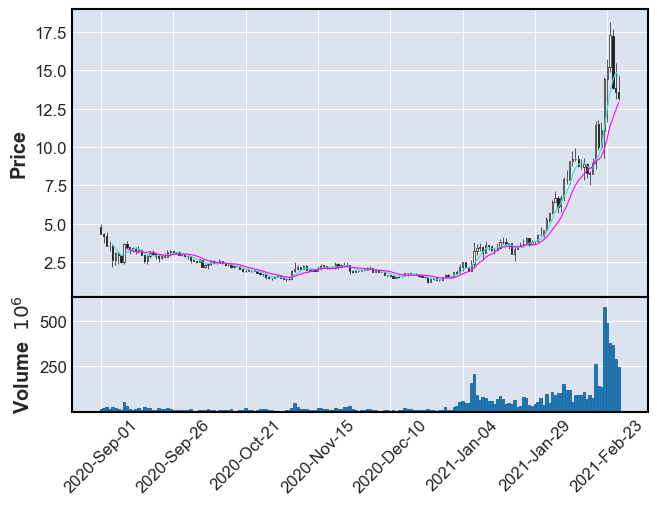

In [6]:
mpf.plot(temp_sol_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_Solana.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,14.623291,13.847314,15.414738
183,2021-03-03 23:59:59,14.990685,14.157459,15.772702
184,2021-03-04 23:59:59,15.131023,14.270306,15.924619
185,2021-03-05 23:59:59,15.556876,14.724250,16.428619
186,2021-03-06 23:59:59,15.680595,14.803305,16.512160


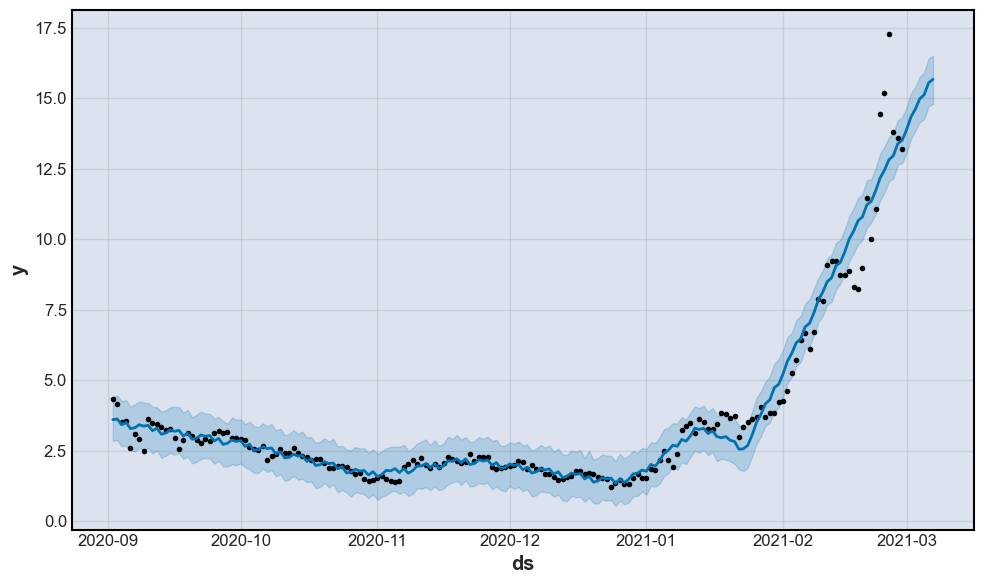

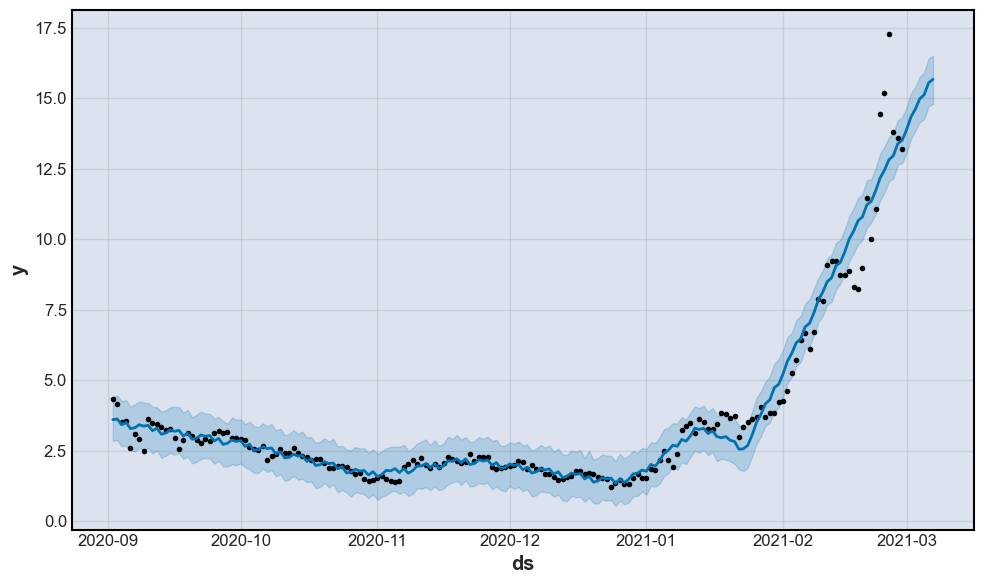

In [9]:
m.plot(forecast)

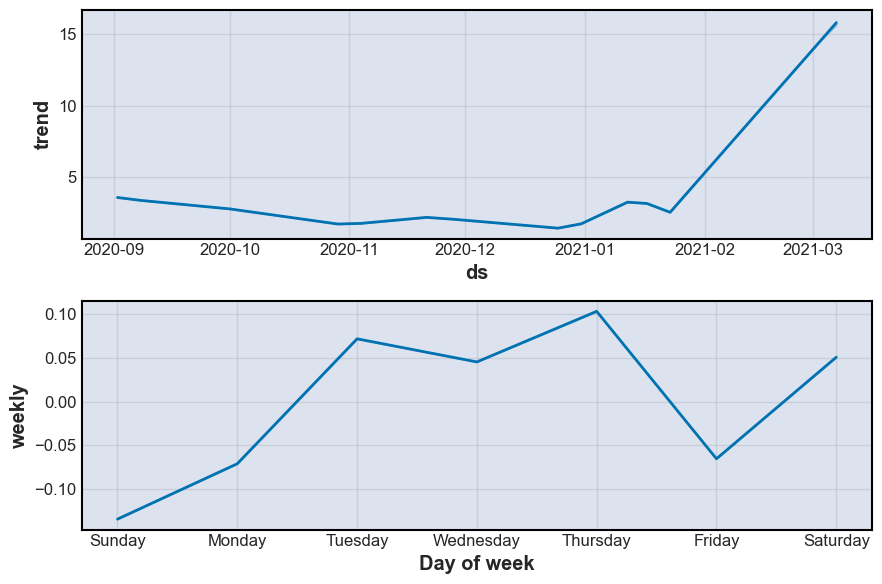

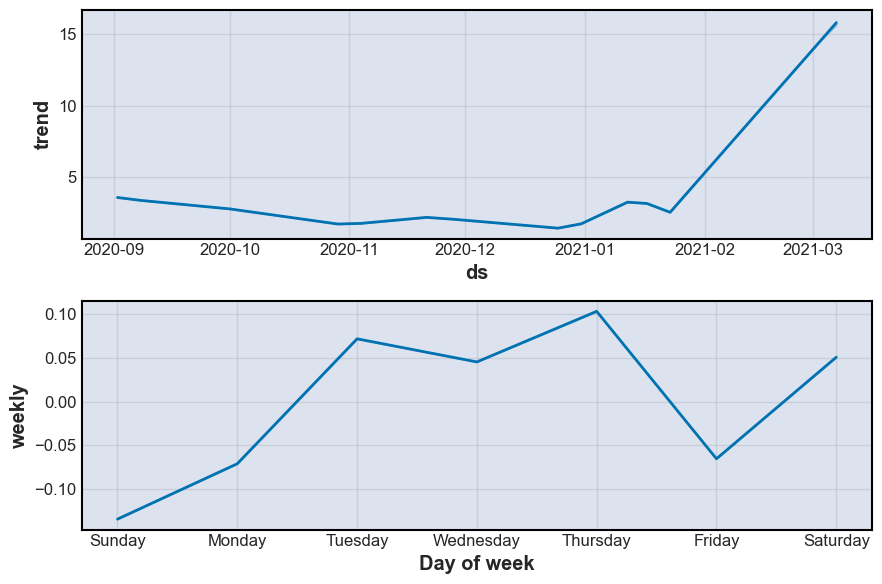

In [10]:
m.plot_components(forecast)